<a href="https://colab.research.google.com/github/shivampip/MyYOLO/blob/master/Object_detection_in_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clone darknet

In [1]:
! git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 10572, done.
remote: Total 10572 (delta 0), reused 0 (delta 0), pack-reused 10572
Receiving objects: 100% (10572/10572), 10.24 MiB | 10.96 MiB/s, done.
Resolving deltas: 100% (7141/7141), done.


In [2]:
cd darknet

/content/darknet


### Modify Makefile to use GPU and OpenCV

In [3]:
! cat Makefile

GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)

DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	  -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, XNOR Tensor Cores
# ARCH= -gencode arch=compute_75,code=[sm_75,compute_75]

# Jetson XAVIER
# ARCH= -gencode arch=compute_72,code=[sm_72,compute_72]

# GTX 1080, GTX 1070, GTX 1060, GTX 1050, GTX 1030, Titan Xp, Tesla P40, Tesl

In [0]:
text= ""
with open("Makefile", 'r') as mf:
    text= mf.read().replace("GPU=0", "GPU=1")
    text= text.replace("OPENCV=0", "OPENCV=1")
with open("Makefile", "w") as f:
    f.write(text)

In [0]:
! make

### Download weights

In [9]:
! wget https://pjreddie.com/media/files/yolov3.weights

--2019-07-17 10:04:46--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  21.4MB/s    in 12s     

2019-07-17 10:04:58 (20.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



### Testing

In [11]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg -dont_show

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

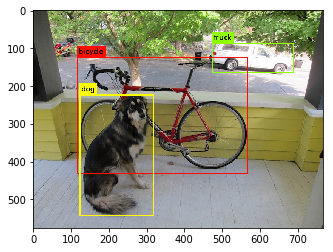

In [13]:
plt.imshow(plt.imread("predictions.jpg"))

### Upload video file

In [28]:
from google.colab import files
files.upload()

Saving test.avi to test.avi


{'test.avi': b'RIFF\x94r\x15\x00AVI LIST\xca"\x00\x00hdrlavih8\x00\x00\x00@\x9c\x00\x00L\x11\x02\x00\x00\x00\x00\x00\x10\t\x00\x00\xf7\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x10\x00\x80\x02\x00\x00h\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00LIST\xe0\x10\x00\x00strlstrh8\x00\x00\x00vidsH264\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x19\x00\x00\x00\x00\x00\x00\x00\xf7\x00\x00\x00BY\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x80\x02h\x01strf(\x00\x00\x00(\x00\x00\x00\x80\x02\x00\x00h\x01\x00\x00\x01\x00\x18\x00H264\x00\x8c\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00JUNK\x18\x10\x00\x00\x04\x00\x00\x00\x00\x00\x00\x0000dc\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [0]:
mv test.avi data/

In [30]:
ls data/

9k.tree     eagle.jpg    house_tour.avi            openimages.names  voc.names
coco9k.map  giraffe.jpg  imagenet.labels.list      person.jpg
coco.names  goal.txt     imagenet.shortnames.list  scream.jpg
dog.jpg     horses.jpg   labels/                   test.avi


### Perform

In [0]:
pip install ffmpeg 

In [0]:
! ./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output data/test.avi -out_filename result.avi -dont_show

**Output is saved in _result.avi_**

In [33]:
ls

3rdparty/     CMakeLists.txt          include/                result.avi
appveyor.yml  darknet*                json_mjpeg_streams.sh*  results/
backup/       DarknetConfig.cmake.in  LICENSE                 scripts/
build/        darknet.py              Makefile                src/
build.ps1*    darknet_video.py        net_cam_v3.sh*          video_v2.sh*
build.sh*     data/                   obj/                    video_yolov3.sh*
cfg/          image_yolov2.sh*        predictions.jpg         yolov3.weights
cmake/        image_yolov3.sh*        README.md
